In [92]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow import keras

import seaborn as sn
import matplotlib.pyplot as plt
from pylab import rcParams
import netCDF4 as nc
rcParams['figure.figsize'] = 10, 6
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15

file = '../Data/tas_train.nc'
data_in = nc.Dataset(file, 'r')
x1_nc = data_in.variables['var1'].__array__().data
lat = nc.Dataset(file, 'r').variables['lat'].__array__().data
lon = nc.Dataset(file, 'r').variables['lon'].__array__().data


def to_binary(y_in):
    y_out = y_in>0
    y_out = y_out.astype(float)
    return y_out

def load_data(output_path = '../Data/nao_index_train.npy',
              x1_path = '../Data/tas_train.npy',
              x2_path = '../Data/psl_train.npy'):
    '''
    Parameters
    ----------
    output_path : TYPE, optional
        DESCRIPTION. The default is './Data/nao_index_train.npy'.
    x1_path : TYPE, optional
        DESCRIPTION. The default is './Data/tas_train.npy'.
    x2_path : TYPE, optional
        DESCRIPTION. The default is './Data/psl_train.npy'.

    Returns
    -------

    x1 : North Atlantic and Tropical Atlantic near surface air temperature, 
        October-November average (one vector of dimension M1 per year= instance)
    x2 : North Atlantic sea-level-pressure, October-November average 
        (one vector of dimension M2 per instance), Shape(N,M2)
    y : North Atlantic Oscillation Index

    '''
    
    y = np.load(output_path)
    x1 = np.load(x1_path)
    x2 = np.load(x2_path)
    return x1, x2, y




x1, x2, y = load_data()
x1 = x1.reshape((900,54,43))
x2 = x2.reshape((900,54,43))

x_combined = np.concatenate((np.expand_dims(x1,axis=3),np.expand_dims(x2,axis=3)), axis = 3)



### Categorize NAO into 3 categories #####
med_ids = np.where(np.logical_and(-1.4<y, y<1.4))[0]
y[y>=1.4] = 1. 
y[y<=-1.4] = -1.
y[med_ids] = 0.

In [93]:
extreme_pos = np.array(np.where(y==1.)).flatten()
extreme_neg = np.array(np.where(y==-1.)).flatten()

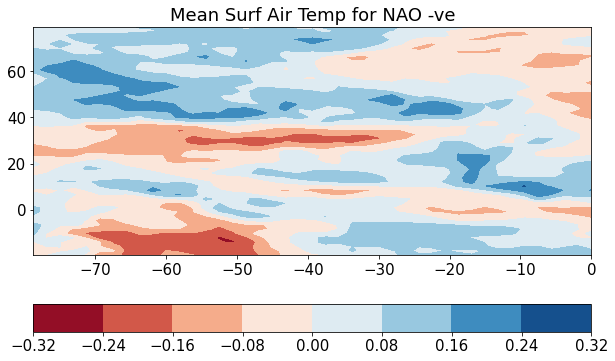

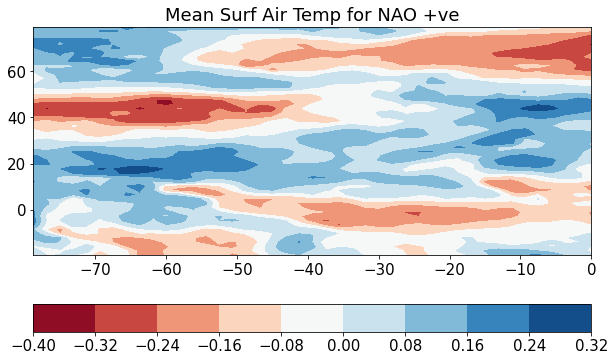

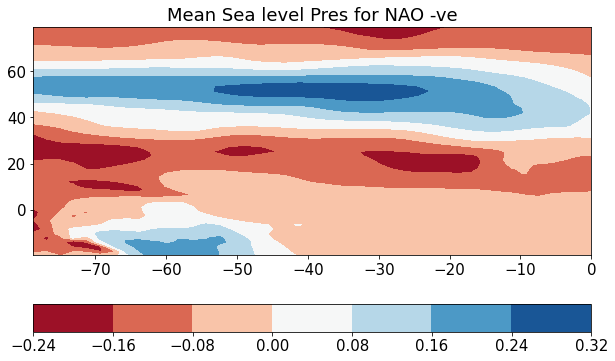

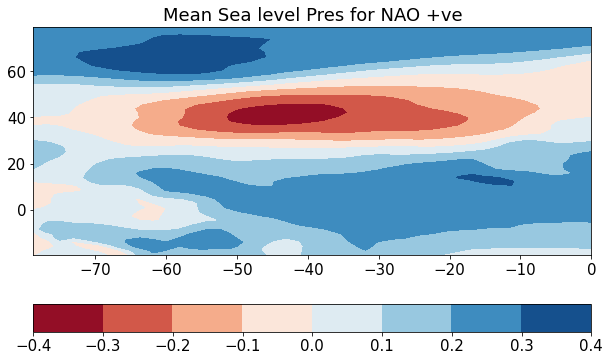

In [99]:
fig, ax = plt.subplots()
im = ax.contourf(lon, lat, x1[extreme_neg, :, :].mean(axis=0), cmap='RdBu')
ax.set_title("Mean Surf Air Temp for NAO -ve")
fig.colorbar(im,orientation="horizontal")
fig.savefig('../Plots/mean_neg_temp.pdf', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots()
im = ax.contourf(lon, lat, x1[extreme_pos, :, :].mean(axis=0),cmap='RdBu')
ax.set_title("Mean Surf Air Temp for NAO +ve")
fig.colorbar(im, orientation="horizontal")
fig.savefig('../Plots/mean_pos_temp.pdf', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots()
im = ax.contourf(lon, lat, x2[extreme_neg, :, :].mean(axis=0),cmap='RdBu')
ax.set_title("Mean Sea level Pres for NAO -ve")
fig.colorbar(im, orientation="horizontal")
fig.savefig('../Plots/mean_neg_pres.pdf', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots()
im = ax.contourf(lon, lat, x2[extreme_pos, :, :].mean(axis=0),cmap='RdBu')
ax.set_title("Mean Sea level Pres for NAO +ve")
fig.colorbar(im, orientation="horizontal")
fig.savefig('../Plots/mean_pos_pres.pdf', dpi=400, bbox_inches='tight')

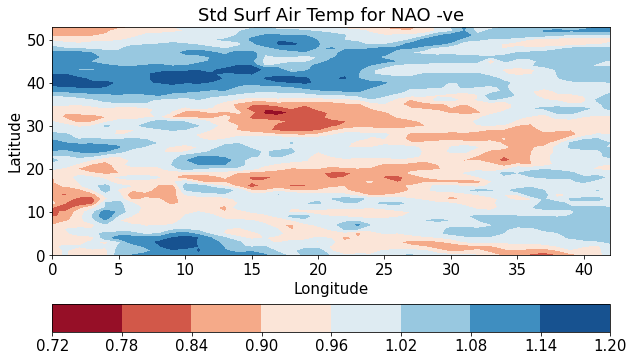

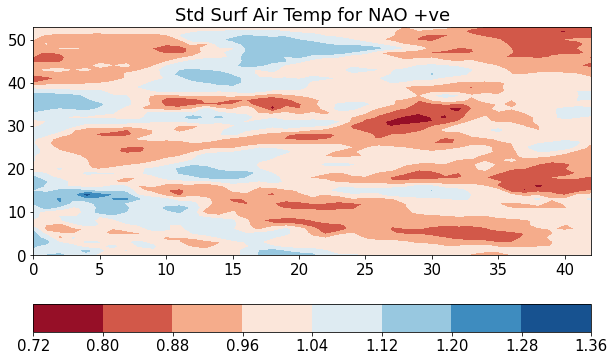

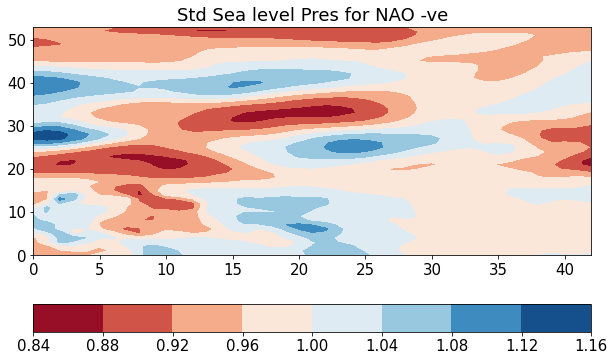

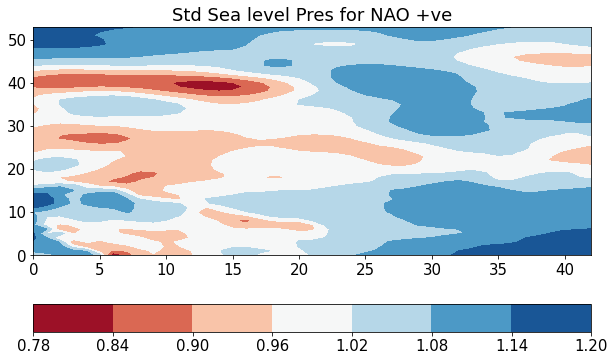

In [98]:
fig, ax = plt.subplots()
im = ax.contourf(x1[extreme_neg, :, :].std(axis=0), cmap='RdBu')
ax.set_title("Std Surf Air Temp for NAO -ve")
fig.colorbar(im, orientation="horizontal")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
fig.savefig('../Plots/std_neg_temp.pdf', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots()
im = ax.contourf(x1[extreme_pos, :, :].std(axis=0), cmap='RdBu')
ax.set_title("Std Surf Air Temp for NAO +ve")
fig.colorbar(im, orientation="horizontal")
fig.savefig('../Plots/std_pos_temp.pdf', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots()
im = ax.contourf(x2[extreme_neg, :, :].std(axis=0), cmap='RdBu')
ax.set_title("Std Sea level Pres for NAO -ve")
fig.colorbar(im, orientation="horizontal")
fig.savefig('../Plots/std_neg_pres.pdf', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots()
im = ax.contourf(x2[extreme_pos, :, :].std(axis=0), cmap='RdBu')
ax.set_title("Std Sea level Pres for NAO +ve")
fig.colorbar(im, orientation="horizontal")
fig.savefig('../Plots/std_pos_pres.pdf', dpi=400, bbox_inches='tight')

In [69]:
x1[extreme_neg, :, :].mean(axis=0).shape

(54, 43)

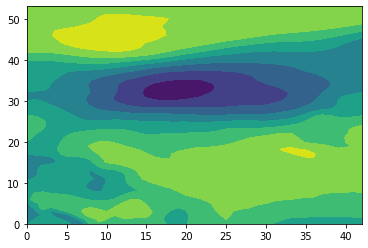

In [33]:
plt.contourf(x2[extreme_pos, :, :].mean(axis=0))

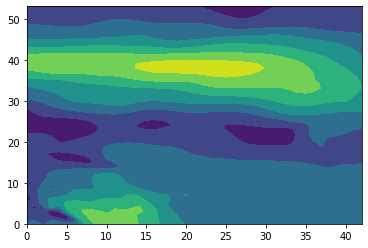

In [34]:
plt.contourf(x2[extreme_neg, :, :].mean(axis=0))

In [57]:
np.where(x2 < 0.0)

(array([  0,   0,   0, ..., 899, 899, 899]),
 array([ 0,  0,  0, ..., 40, 40, 40]),
 array([ 0,  1,  2, ..., 19, 20, 21]))